# Multiclass Classification

In [ ]:
!pip install pycaret

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
glassData = get_data('glass')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Setup

In [ ]:
from pycaret.classification import *
s = setup(glassData, target = 'Type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
# import ClassificationExperiment and initialize the class
from pycaret.classification import ClassificationExperiment
classExperiment = ClassificationExperiment()

In [ ]:
# type check of the experiment
type(classExperiment)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
classExperiment.setup(glassData, target = 'Type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
best = compare_models()

# Compare models with OOP

classExperiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.1770
rf,Random Forest Classifier,0.7590,0.5643,0.7590,0.7251,0.7278,0.6631,0.6802,0.2220
lightgbm,Light Gradient Boosting Machine,0.7252,0.5538,0.7252,0.6886,0.6919,0.6115,0.6281,0.7310
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.9710
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1240
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0720
knn,K Neighbors Classifier,0.5919,0.4895,0.5919,0.5416,0.5488,0.4180,0.4341,0.2080
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0380
lr,Logistic Regression,0.5776,0.0000,0.5776,0.5415,0.5312,0.4046,0.4337,1.8840
ridge,Ridge Classifier,0.5705,0.0000,0.5705,0.5096,0.5111,0.3834,0.4121,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.1860
rf,Random Forest Classifier,0.7590,0.5643,0.7590,0.7251,0.7278,0.6631,0.6802,0.2210
lightgbm,Light Gradient Boosting Machine,0.7252,0.5538,0.7252,0.6886,0.6919,0.6115,0.6281,0.5810
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.7610
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1170
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0390
knn,K Neighbors Classifier,0.5919,0.4895,0.5919,0.5416,0.5488,0.4180,0.4341,0.0530
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0350
lr,Logistic Regression,0.5776,0.0000,0.5776,0.5415,0.5312,0.4046,0.4337,0.2300
ridge,Ridge Classifier,0.5705,0.0000,0.5705,0.5096,0.5111,0.3834,0.4121,0.0360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

## Analyze Model

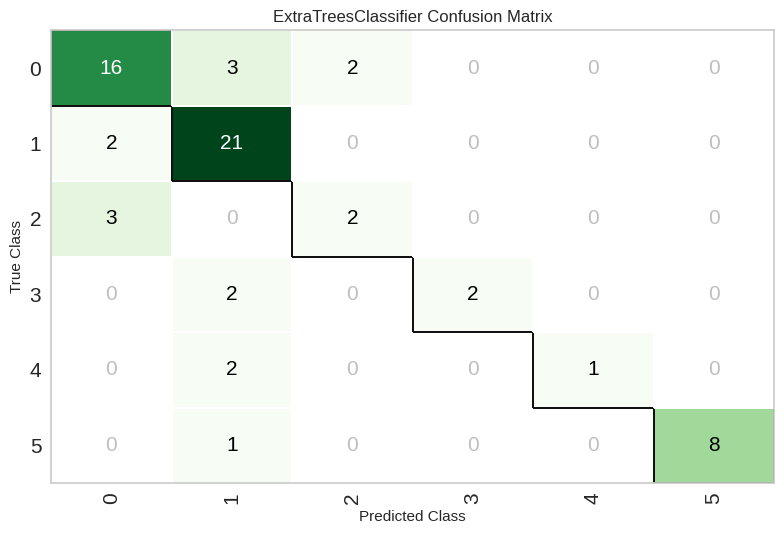

In [ ]:
plot_model(best, plot = 'confusion_matrix')

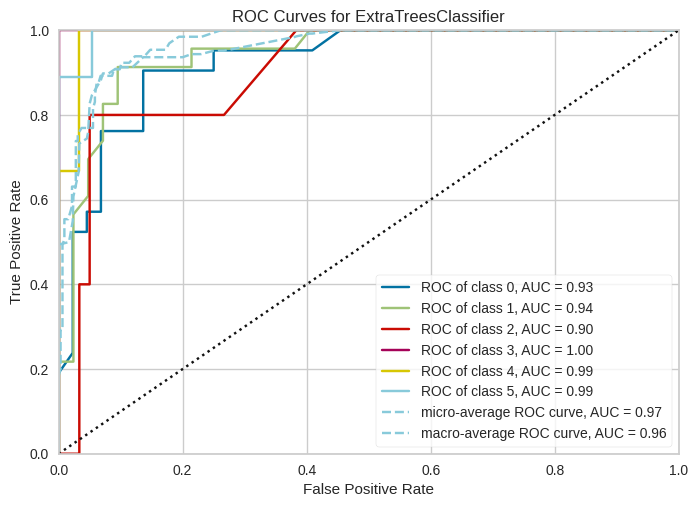

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

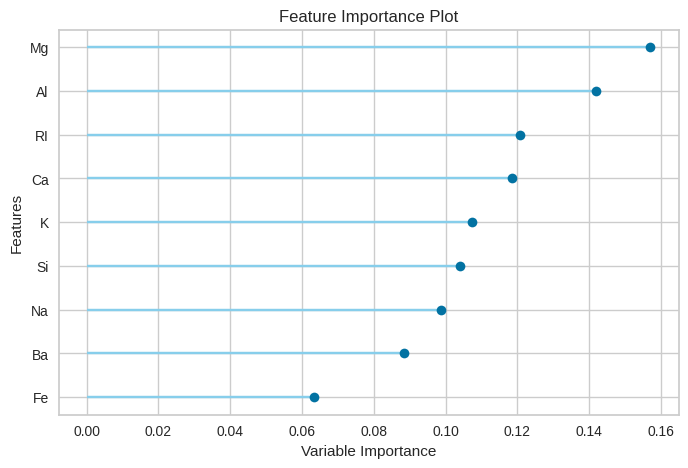

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7692,0.9468,0.7692,0.7870,0.7606,0.6765,0.6824


In [ ]:
# show predictions df
holdout_pred.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
175,1.52119,12.97,0.33,1.51,73.389999,0.13,11.27,0.0,0.28,5,2,0.54
108,1.52222,14.43,0.00,1.00,72.669998,0.10,11.52,0.0,0.08,2,2,0.59
84,1.51409,14.25,3.09,2.08,72.279999,1.10,7.08,0.0,0.00,2,2,0.49
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.00,1,1,0.50
182,1.51916,14.15,0.00,2.09,72.739998,0.00,10.88,0.0,0.00,6,2,0.32


In [ ]:
# copy data and drop Class

new_data = glassData.copy()
new_data.drop('Type', axis=1, inplace=True)
new_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,prediction_label,prediction_score
0,1.52101,13.64,4.49,1.10,71.779999,0.06,8.75,0.0,0.0,1,1.00
1,1.51761,13.89,3.60,1.36,72.730003,0.48,7.83,0.0,0.0,1,1.00
2,1.51618,13.53,3.55,1.54,72.989998,0.39,7.78,0.0,0.0,2,0.85
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.0,1,0.50
4,1.51742,13.27,3.62,1.24,73.080002,0.55,8.07,0.0,0.0,1,0.81


## Save Model

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                              'Ca', 'Ba', 'Fe'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                             'Ca', 'Ba', 'Fe'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_f...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

## Setup

In [ ]:
# initialise setup function
s = setup(glassData, target = 'Type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X_train_transformed')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
103,1.52725,13.80,3.15,0.66,70.570000,0.08,11.64,0.00,0.00
171,1.51316,13.02,0.00,3.04,70.480003,6.21,6.96,0.00,0.00
187,1.52315,13.44,3.34,1.23,72.379997,0.60,8.83,0.00,0.00
109,1.51818,13.72,0.00,0.56,74.449997,0.00,10.99,0.00,0.00
87,1.51645,13.40,3.49,1.52,72.650002,0.67,8.08,0.00,0.10
...,...,...,...,...,...,...,...,...,...
34,1.51783,12.69,3.54,1.34,72.949997,0.57,8.75,0.00,0.00
53,1.51837,13.14,2.84,1.28,72.849998,0.55,9.07,0.00,0.00
15,1.51761,12.81,3.54,1.23,73.239998,0.58,8.39,0.00,0.00
207,1.51831,14.39,0.00,1.82,72.860001,1.41,6.47,2.88,0.00


In [ ]:
s = setup(glassData, target = 'Type', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


<Axes: >

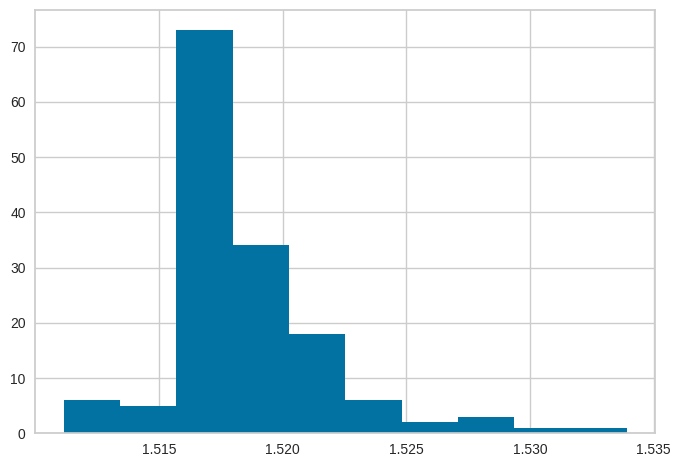

In [ ]:
get_config('X_train')['RI'].hist()

___

## Compare Models

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7724,0.5650,0.7724,0.7370,0.7419,0.6805,0.6964,0.2320
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.1830
lightgbm,Light Gradient Boosting Machine,0.7452,0.5555,0.7452,0.6892,0.7072,0.6373,0.6511,0.2810
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,1.0730
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1240
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0780
knn,K Neighbors Classifier,0.6319,0.4938,0.6319,0.5968,0.5968,0.4798,0.4966,0.0740
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0420
ridge,Ridge Classifier,0.5310,0.0000,0.5310,0.4660,0.4709,0.3293,0.3546,0.0640
svm,SVM - Linear Kernel,0.5176,0.0000,0.5176,0.4433,0.4376,0.3252,0.3783,0.0940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
tree_models = compare_models(include = ['dt', 'rf', 'et', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7724,0.5650,0.7724,0.7370,0.7419,0.6805,0.6964,0.4360
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.2090
lightgbm,Light Gradient Boosting Machine,0.7452,0.5555,0.7452,0.6892,0.7072,0.6373,0.6511,0.3590
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1220
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0560


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
tree_models_results = pull()
tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7724,0.5650,0.7724,0.7370,0.7419,0.6805,0.6964,0.436
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.209
lightgbm,Light Gradient Boosting Machine,0.7452,0.5555,0.7452,0.6892,0.7072,0.6373,0.6511,0.359
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.122
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.056


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7724,0.5650,0.7724,0.7370,0.7419,0.6805,0.6964,0.2660
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.2290
lightgbm,Light Gradient Boosting Machine,0.7452,0.5555,0.7452,0.6892,0.7072,0.6373,0.6511,0.2010
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.8040
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1210
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0740
knn,K Neighbors Classifier,0.6319,0.4938,0.6319,0.5968,0.5968,0.4798,0.4966,0.0600
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0780
ridge,Ridge Classifier,0.5310,0.0000,0.5310,0.4660,0.4709,0.3293,0.3546,0.0810
svm,SVM - Linear Kernel,0.5176,0.0000,0.5176,0.4433,0.4376,0.3252,0.3783,0.0850


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
best_recall_models_top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

## Set Custom Metrics

In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7de974a0f9a0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7de974a0fd00>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7de974a0ff40>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [ ]:
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

add_metric('custom_metric', 'Custom Metric', custom_metric)

,custom_metric
Name,Custom Metric
Display Name,Custom Metric
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(custom_metric, response_method='pr..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
rf,Random Forest Classifier,0.7724,0.5650,0.7724,0.7370,0.7419,0.6805,0.6964,0.0000,0.3340
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.0000,0.3120
lightgbm,Light Gradient Boosting Machine,0.7452,0.5555,0.7452,0.6892,0.7072,0.6373,0.6511,0.0000,0.4290
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.0000,0.7690
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.0000,0.1230
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0000,0.0730
knn,K Neighbors Classifier,0.6319,0.4938,0.6319,0.5968,0.5968,0.4798,0.4966,0.0000,0.0590
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0000,0.0720
ridge,Ridge Classifier,0.5310,0.0000,0.5310,0.4660,0.4709,0.3293,0.3546,0.0000,0.0830
svm,SVM - Linear Kernel,0.5176,0.0000,0.5176,0.4433,0.4376,0.3252,0.3783,0.0000,0.0810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
remove_metric('custom_metric')

## Create Model

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6000,0.5785,0.4231,0.4438
1,0.4667,0.0000,0.4667,0.4400,0.4013,0.2453,0.2930
2,0.4667,0.0000,0.4667,0.3704,0.3860,0.2308,0.2568
3,0.6000,0.0000,0.6000,0.6556,0.5067,0.4479,0.5275
4,0.6000,0.0000,0.6000,0.5071,0.5333,0.4444,0.4629
5,0.5333,0.0000,0.5333,0.4000,0.4444,0.3000,0.3472
6,0.4000,0.0000,0.4000,0.3250,0.3538,0.1346,0.1410
7,0.4000,0.0000,0.4000,0.3694,0.3639,0.1176,0.1247
8,0.5333,0.0000,0.5333,0.4583,0.4872,0.3269,0.3425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
results = pull()
print(type(results))
results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0,0.6000,0.6000,0.5785,0.4231,0.4438
1,0.4667,0.0,0.4667,0.4400,0.4013,0.2453,0.2930
2,0.4667,0.0,0.4667,0.3704,0.3860,0.2308,0.2568
3,0.6000,0.0,0.6000,0.6556,0.5067,0.4479,0.5275
4,0.6000,0.0,0.6000,0.5071,0.5333,0.4444,0.4629
5,0.5333,0.0,0.5333,0.4000,0.4444,0.3000,0.3472
6,0.4000,0.0,0.4000,0.3250,0.3538,0.1346,0.1410
7,0.4000,0.0,0.4000,0.3694,0.3639,0.1176,0.1247
8,0.5333,0.0,0.5333,0.4583,0.4872,0.3269,0.3425


In [ ]:
lr_model = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5600,0.0000,0.5600,0.5105,0.5139,0.3775,0.4010
1,0.5600,0.0000,0.5600,0.4664,0.5034,0.3472,0.3599
2,0.5306,0.0000,0.5306,0.4619,0.4843,0.3132,0.3251
Mean,0.5502,0.0000,0.5502,0.4796,0.5006,0.3460,0.3620
Std,0.0139,0.0000,0.0139,0.0219,0.0122,0.0262,0.0310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.5533,0.5627,0.4040,0.4224
1,0.4667,0.0000,0.4667,0.4400,0.4013,0.2453,0.2930
2,0.4667,0.0000,0.4667,0.3704,0.3860,0.2308,0.2568
3,0.5333,0.0000,0.5333,0.5667,0.4222,0.3519,0.4232
4,0.6667,0.0000,0.6667,0.5333,0.5915,0.5283,0.5401
5,0.5333,0.0000,0.5333,0.4000,0.4444,0.3000,0.3472
6,0.4000,0.0000,0.4000,0.3250,0.3538,0.1346,0.1410
7,0.3333,0.0000,0.3333,0.2202,0.2650,0.0000,0.0000
8,0.5333,0.0000,0.5333,0.4583,0.4872,0.3269,0.3425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Tune Model

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6857,0.6632,0.5161,0.5232
1,0.6667,0.0000,0.6667,0.6762,0.6359,0.5455,0.5700
2,0.6667,0.0000,0.6667,0.6270,0.6244,0.5253,0.5426
3,0.8000,0.8643,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.6000,0.7429,0.6000,0.6048,0.5730,0.4767,0.4971
5,0.8000,0.8500,0.8000,0.7556,0.7758,0.7256,0.7304
6,0.7333,0.8143,0.7333,0.7500,0.7333,0.6512,0.6551
7,0.5333,0.6643,0.5333,0.4667,0.4970,0.3519,0.3591
8,0.4667,0.6258,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt_tuned = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.0000,0.5333,0.5952,0.5499,0.3396,0.3440
1,0.7333,0.0000,0.7333,0.7000,0.6844,0.6450,0.6729
2,0.7333,0.0000,0.7333,0.6972,0.6831,0.6129,0.6522
3,0.8000,0.9200,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.5333,0.7352,0.5333,0.6603,0.4956,0.4000,0.4324
5,0.5333,0.7805,0.5333,0.4815,0.4794,0.3137,0.3409
6,0.6667,0.8633,0.6667,0.6667,0.6337,0.5536,0.5858
7,0.7333,0.8519,0.7333,0.7738,0.7333,0.6364,0.6486
8,0.4667,0.6905,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6857,0.6632,0.5161,0.5232
1,0.6667,0.0000,0.6667,0.6762,0.6359,0.5455,0.5700
2,0.6667,0.0000,0.6667,0.6270,0.6244,0.5253,0.5426
3,0.8000,0.8643,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.6000,0.7429,0.6000,0.6048,0.5730,0.4767,0.4971
5,0.8000,0.8500,0.8000,0.7556,0.7758,0.7256,0.7304
6,0.7333,0.8143,0.7333,0.7500,0.7333,0.6512,0.6551
7,0.5333,0.6643,0.5333,0.4667,0.4970,0.3519,0.3591
8,0.4667,0.6258,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt_tuned, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.0000,0.5333,0.5952,0.5499,0.3396,0.3440
1,0.7333,0.0000,0.7333,0.7000,0.6844,0.6450,0.6729
2,0.7333,0.0000,0.7333,0.6972,0.6831,0.6129,0.6522
3,0.8000,0.9200,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.5333,0.7352,0.5333,0.6603,0.4956,0.4000,0.4324
5,0.5333,0.7805,0.5333,0.4815,0.4794,0.3137,0.3409
6,0.6667,0.8633,0.6667,0.6667,0.6337,0.5536,0.5858
7,0.7333,0.8519,0.7333,0.7738,0.7333,0.6364,0.6486
8,0.4667,0.6905,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['RI',
                                                                          'Na',
                                                                          'Mg',
                                                                          'Al',
                                                                          'Si',
                                                                          'K',
                                                                          'C...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## Ensemble Model

In [ ]:
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6524,0.6451,0.5000,0.5079
1,0.7333,0.0000,0.7333,0.5540,0.6270,0.6178,0.6495
2,0.6000,0.0000,0.6000,0.5756,0.5794,0.4268,0.4323
3,0.8667,0.9919,0.8667,0.7667,0.8097,0.8160,0.8269
4,0.6667,0.8790,0.6667,0.7333,0.6446,0.5714,0.5917
5,0.7333,0.9143,0.7333,0.6571,0.6889,0.6250,0.6385
6,0.7333,0.8967,0.7333,0.6583,0.6786,0.6250,0.6521
7,0.6000,0.8952,0.6000,0.5333,0.5533,0.4375,0.4564
8,0.6000,0.7814,0.6000,0.6111,0.5885,0.4737,0.4821


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6333,0.6000,0.4375,0.4430
1,0.6667,0.0000,0.6667,0.6667,0.6525,0.5562,0.5732
2,0.7333,0.0000,0.7333,0.7937,0.7178,0.6296,0.6581
3,0.6667,0.0000,0.6667,0.6722,0.6622,0.5614,0.5681
4,0.5333,0.0000,0.5333,0.7111,0.5269,0.4134,0.4379
5,0.8000,0.0000,0.8000,0.7556,0.7758,0.7256,0.7304
6,0.7333,0.0000,0.7333,0.7500,0.7333,0.6512,0.6551
7,0.6667,0.0000,0.6667,0.6833,0.6496,0.5342,0.5568
8,0.5333,0.0000,0.5333,0.4889,0.5033,0.3713,0.3758


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## Blend Models

In [ ]:
best_recall_models_top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.7105,0.6687,0.5223,0.5362
1,0.7333,0.0000,0.7333,0.6857,0.6828,0.6203,0.6514
2,0.8000,0.0000,0.8000,0.7270,0.7481,0.7078,0.7324
3,0.8667,0.9905,0.8667,0.7667,0.8097,0.8160,0.8269
4,0.8000,0.9790,0.8000,0.7667,0.7727,0.7305,0.7395
5,0.9333,1.0000,0.9333,0.9444,0.9327,0.9107,0.9162
6,0.8000,0.9333,0.8000,0.7048,0.7444,0.7188,0.7343
7,0.7333,0.9019,0.7333,0.7071,0.7111,0.6341,0.6466
8,0.6000,0.8838,0.6000,0.5222,0.5576,0.4375,0.4439


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## Stack Models

In [ ]:
# list stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6857,0.6632,0.5161,0.5232
1,0.6667,0.0000,0.6667,0.5048,0.5683,0.5130,0.5496
2,0.8000,0.0000,0.8000,0.7270,0.7481,0.7078,0.7324
3,0.8667,0.0000,0.8667,0.7667,0.8097,0.8160,0.8269
4,0.7333,0.0000,0.7333,0.7270,0.7011,0.6407,0.6609
5,0.8667,0.0000,0.8667,0.8381,0.8407,0.8171,0.8331
6,0.6667,0.0000,0.6667,0.5905,0.6222,0.5312,0.5427
7,0.7333,0.0000,0.7333,0.6444,0.6848,0.6250,0.6342
8,0.6667,0.0000,0.6667,0.5381,0.5929,0.5192,0.5359


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       monotonic_cst=None,
                                                       n_estimators=100...
                                               subsample_for_bin=200000,
                                               subsample_freq=0))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## Plot Model

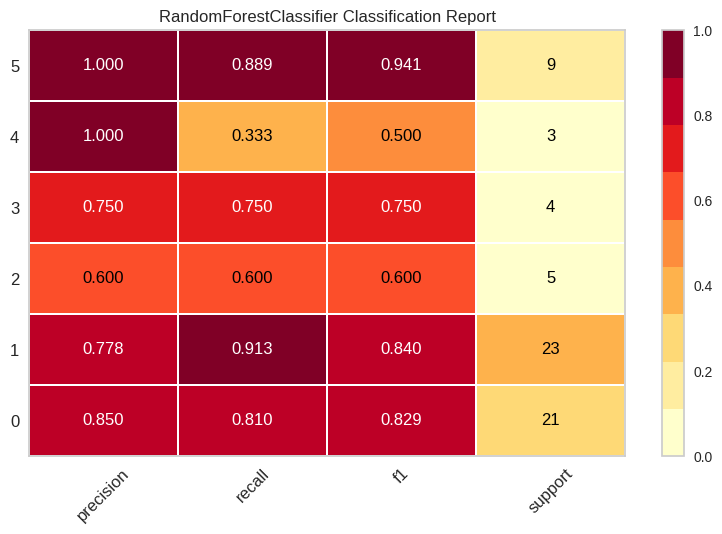

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

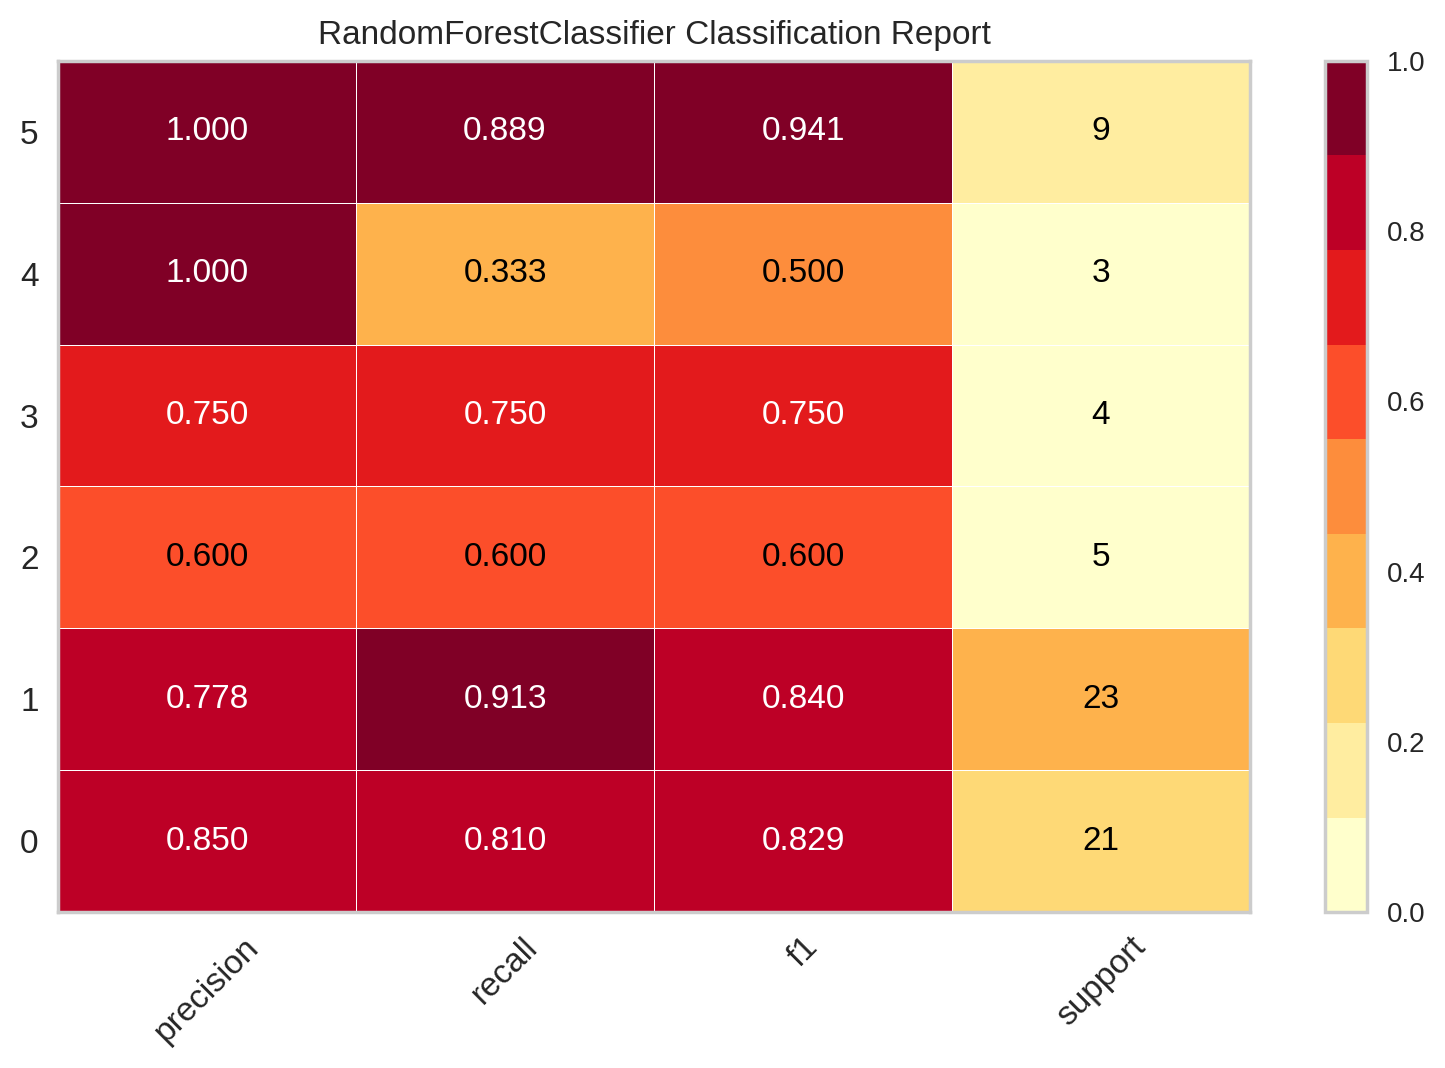

In [ ]:
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
# Save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## Get Leaderboard

In [ ]:
lb = get_leaderboard()
lb

Processing:   0%|          | 0/66 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric
Index,,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5171,0.0000,0.5171,0.4616,0.4579,0.3034,0.3313,NaN
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6319,0.4938,0.6319,0.5968,0.5968,0.4798,0.4966,NaN
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.4771,0.4546,0.4771,0.4872,0.4338,0.3126,0.3450,NaN
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,NaN
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.5176,0.0000,0.5176,0.4433,0.4376,0.3252,0.3783,NaN
...,...,...,...,...,...,...,...,...,...,...
60,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,NaN
61,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6986,0.5359,0.6986,0.6480,0.6575,0.5784,0.5934,NaN
62,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6719,0.0000,0.6719,0.6917,0.6575,0.5574,0.5703,NaN


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                             'Ca', 'Ba', 'Fe'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fal...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False)]],
         verbose=False)

## AutoML

In [ ]:
automl()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## Finalize Model

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                             'Ca', 'Ba', 'Fe'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fal...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## Save / Load Model

In [ ]:
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                              'Ca', 'Ba', 'Fe'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None,

In [ ]:
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                             'Ca', 'Ba', 'Fe'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_f...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## Save / Load Experiment

In [ ]:
save_experiment('my_experiment')

In [ ]:
# load the experiment from disk
exp_from_disk = load_experiment('my_experiment', data=glassData)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True
